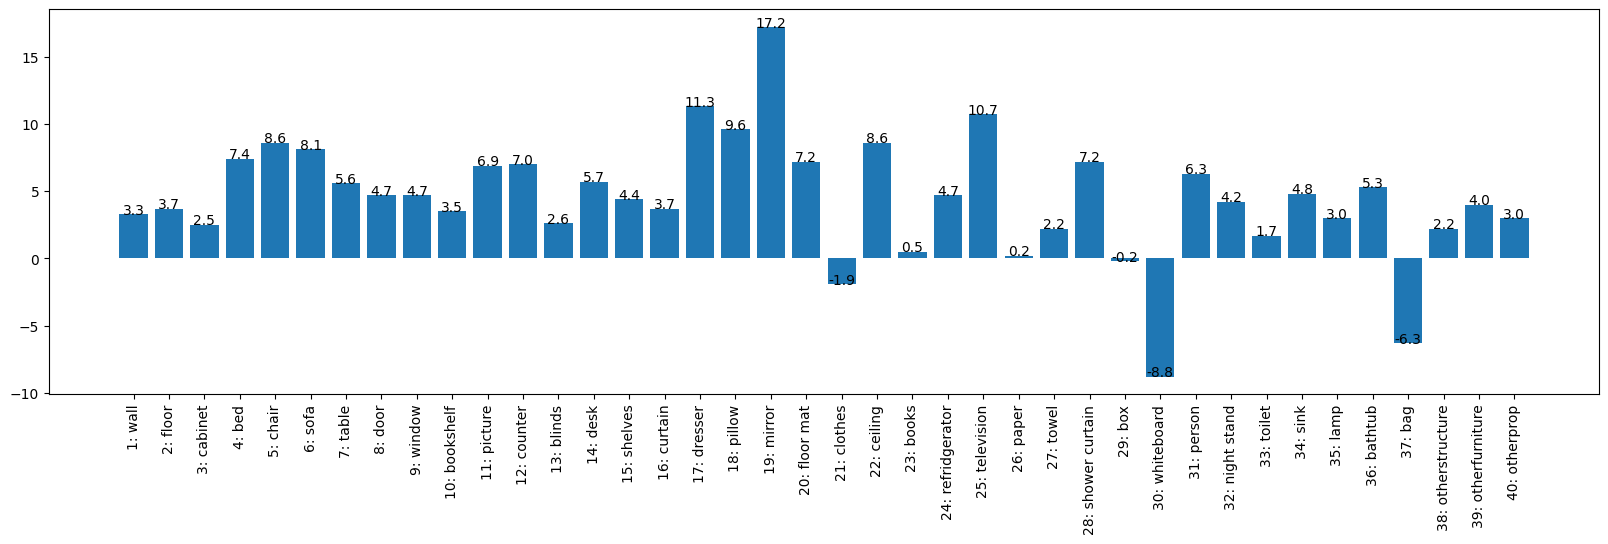

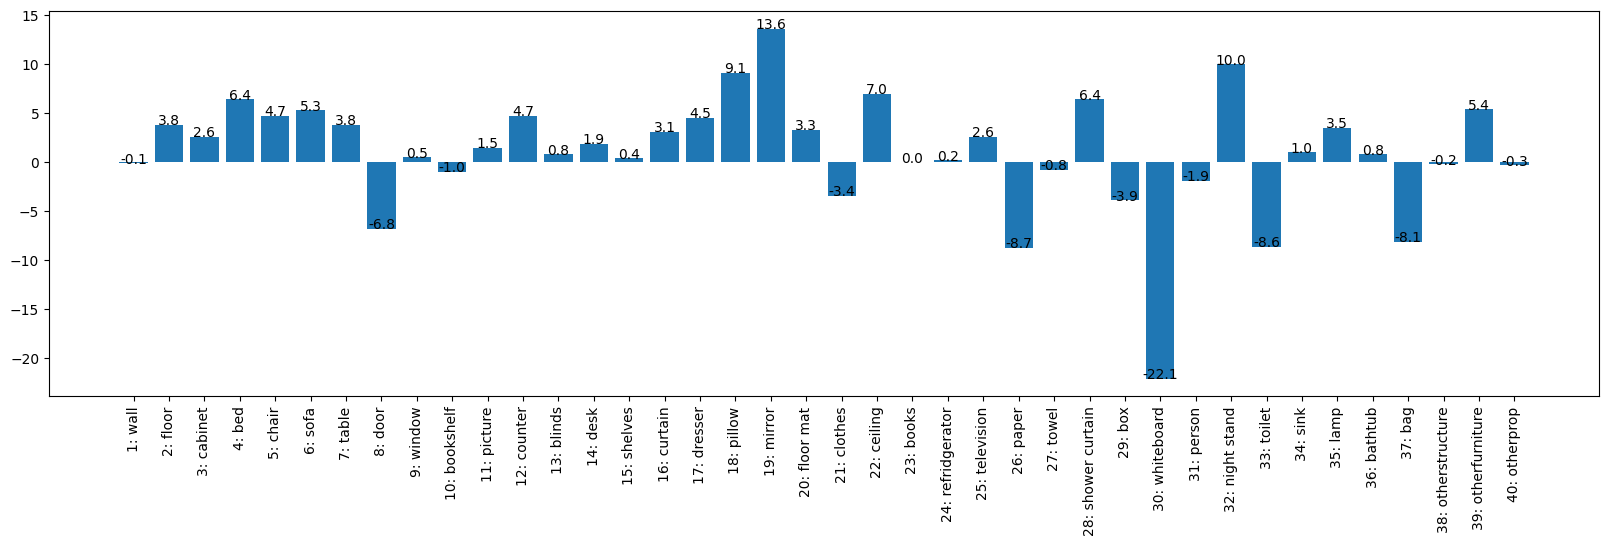

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def create_float_array(s):
    # Remove brackets and split the string into a list of strings
    str_list = s.strip('[]').split()
    # Convert list of strings to list of floats
    float_list = [float(i) for i in str_list]
    # Convert list of floats to numpy array
    array = np.array(float_list)\
    
    return array

def plot_float_array(array):
    classes = ['wall','floor','cabinet','bed','chair','sofa','table','door','window','bookshelf','picture','counter','blinds',
    'desk','shelves','curtain','dresser','pillow','mirror','floor mat','clothes','ceiling','books','refridgerator',
    'television','paper','towel','shower curtain','box','whiteboard','person','night stand','toilet',
    'sink','lamp','bathtub','bag','otherstructure','otherfurniture','otherprop']
    # Plot the array
    plt.figure(figsize=(20, 5))
    plt.bar(range(len(array)), array)
    for i, value in enumerate(array):
        plt.text(i, value, f"{value:.1f}", ha='center')

    new_labels = [f"{i+1}: {class_name}" for i, class_name in enumerate(classes)]

    plt.xticks(range(len(array)), new_labels, rotation=90)
    plt.show()

s_df = "[79.7 83.6 58.0 71.0 62.1 65.0 47.1 41.5 50.6 44.2 61.7 64.0 61.3 23.4 21.2 55.9 52.6 43.3 57.4 38.1 20.4 72.5 32.3 58.7 56.3 29.9 36.5 45.3 12.6 60.3 71.0 40.3 70.7 55.9 41.7 35.1 7.0 30.3 18.4 38.4]"
s_tf = "[76.3 83.7 58.1 70.0 58.2 62.2 45.3 30.0 46.4 39.7 56.3 61.7 59.5 19.6 17.2 55.3 45.8 42.8 53.8 34.2 18.9 70.9 31.8 54.2 48.2 21.0 33.5 44.5 8.9 47.0 62.8 46.1 60.4 52.1 42.2 30.6 5.2 27.9 19.8 35.1]"
s_sf = "[76.4 79.9 55.5 63.6 53.5 56.9 41.5 36.8 45.9 40.7 54.8 57.0 58.7 17.7 16.8 52.2 41.3 33.7 40.2 30.9 22.3 63.9 31.8 54.0 45.6 29.7 34.3 38.1 12.8 69.1 64.7 36.1 69.0 51.1 38.7 29.8 13.3 28.1 14.4 35.4]"
arr_df = create_float_array(s_df)
arr_tf = create_float_array(s_tf)
arr_sf = create_float_array(s_sf)

diff_df_sf = arr_df - arr_sf
diff_tf_sf = arr_tf - arr_sf
# plot_float_array(arr_sf)
plot_float_array(diff_df_sf)
plot_float_array(diff_tf_sf)

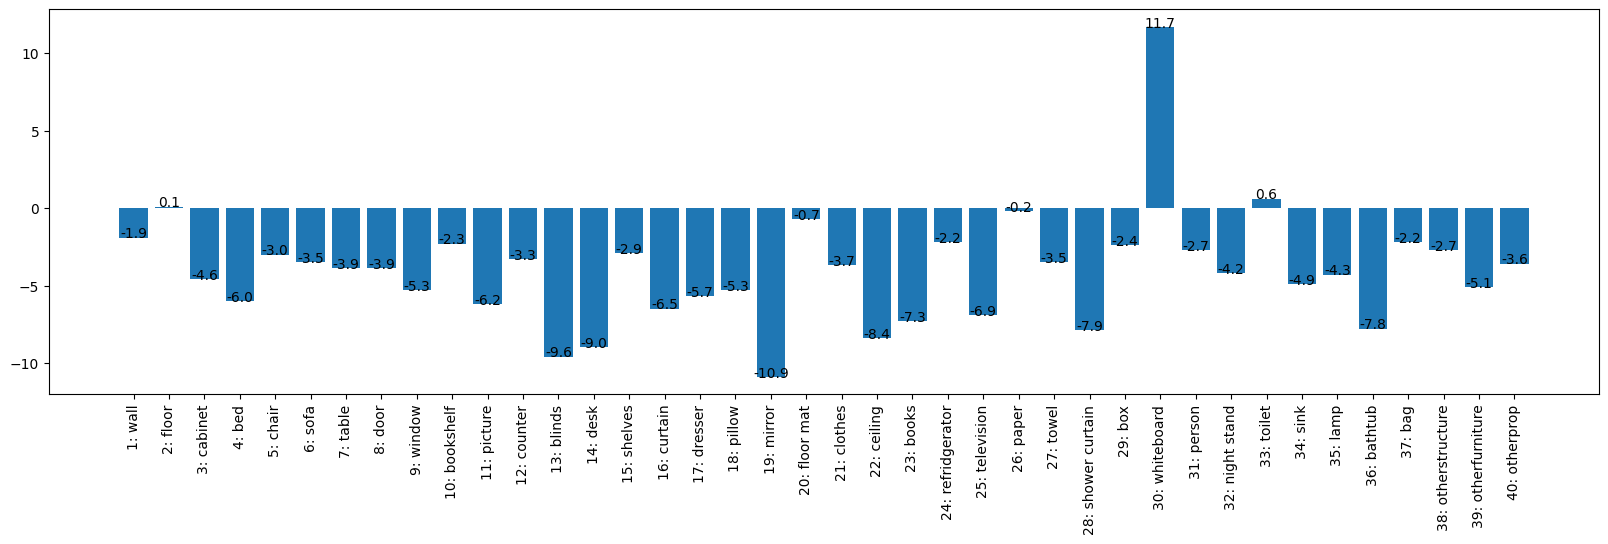

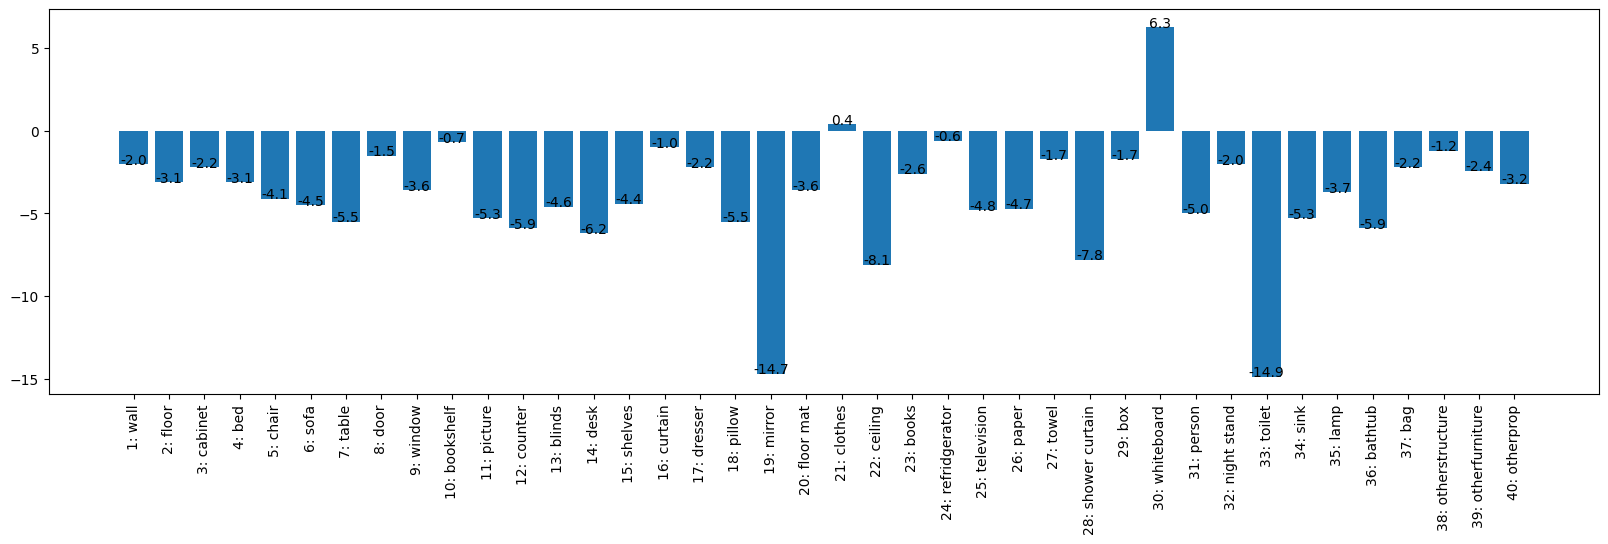

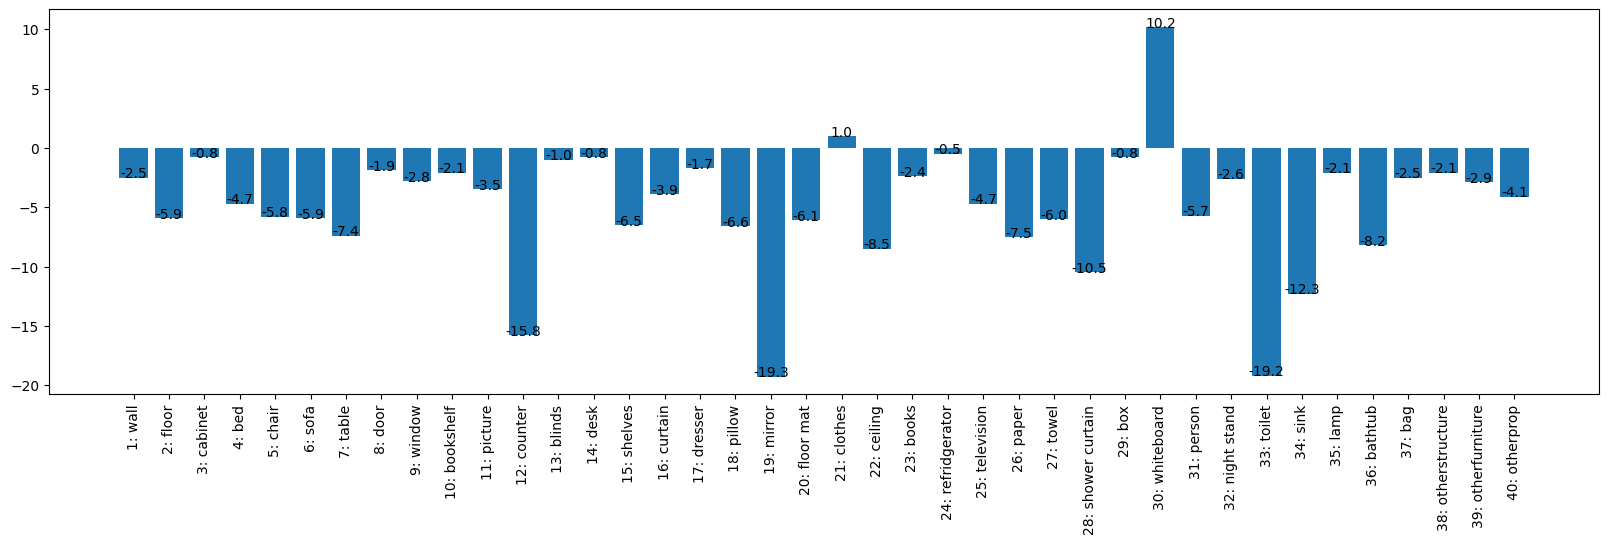

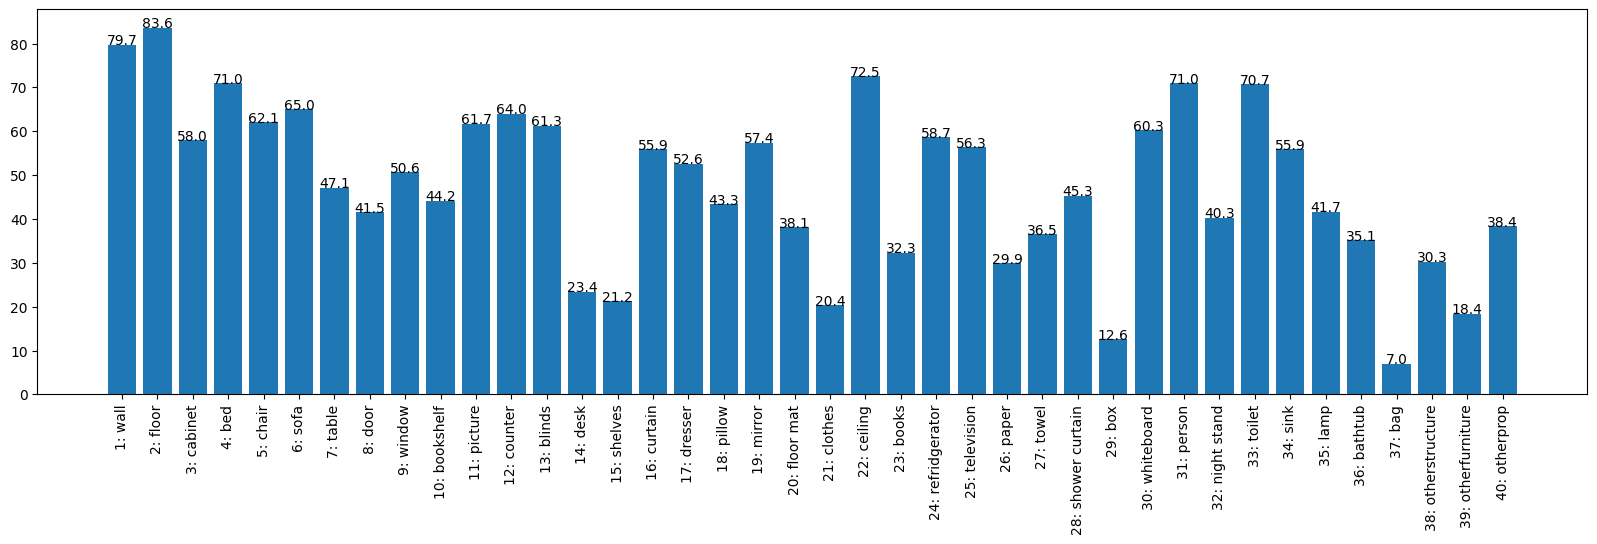

In [8]:
s_df_depth_000_033 = "[77.8 83.7 53.4 65.0 59.1 61.5 43.2 37.6 45.3 41.9 55.5 60.7 51.7 14.4 18.3 49.4 46.9 38.0 46.5 37.4 16.7 64.1 25.0 56.5 49.4 29.7 33.0 37.4 10.2 72.0 68.3 36.1 71.3 51.0 37.4 27.3 4.8 27.6 13.3 34.8]"
s_df_depth_033_066 = "[77.7 80.5 55.8 67.9 58.0 60.5 41.6 40.0 47.0 43.5 56.4 58.1 56.7 17.2 16.8 54.9 50.4 37.8 42.7 34.5 20.8 64.4 29.7 58.1 51.5 25.2 34.8 37.5 10.9 66.6 66.0 38.3 55.8 50.6 38.0 29.2 4.8 29.1 16.0 35.2]"
s_df_depth_066_100 = "[77.2 77.7 57.2 66.3 56.3 59.1 39.7 39.6 47.8 42.1 58.2 48.2 60.3 22.6 14.7 52.0 50.9 36.7 38.1 32.0 21.4 64.0 29.9 58.2 51.6 22.4 30.5 34.8 11.8 70.5 65.3 37.7 51.5 43.6 39.6 26.9 4.5 28.2 15.5 34.3]"

arr_df_depth_000_033 = create_float_array(s_df_depth_000_033)
arr_df_depth_033_066 = create_float_array(s_df_depth_033_066)
arr_df_depth_066_100 = create_float_array(s_df_depth_066_100)

arr_df_diff_000_033 = arr_df_depth_000_033 - arr_df
arr_df_diff_033_066 = arr_df_depth_033_066 - arr_df
arr_df_diff_066_100 = arr_df_depth_066_100 - arr_df

plot_float_array(arr_df_diff_000_033)
plot_float_array(arr_df_diff_033_066)
plot_float_array(arr_df_diff_066_100)

plot_float_array(arr_df)

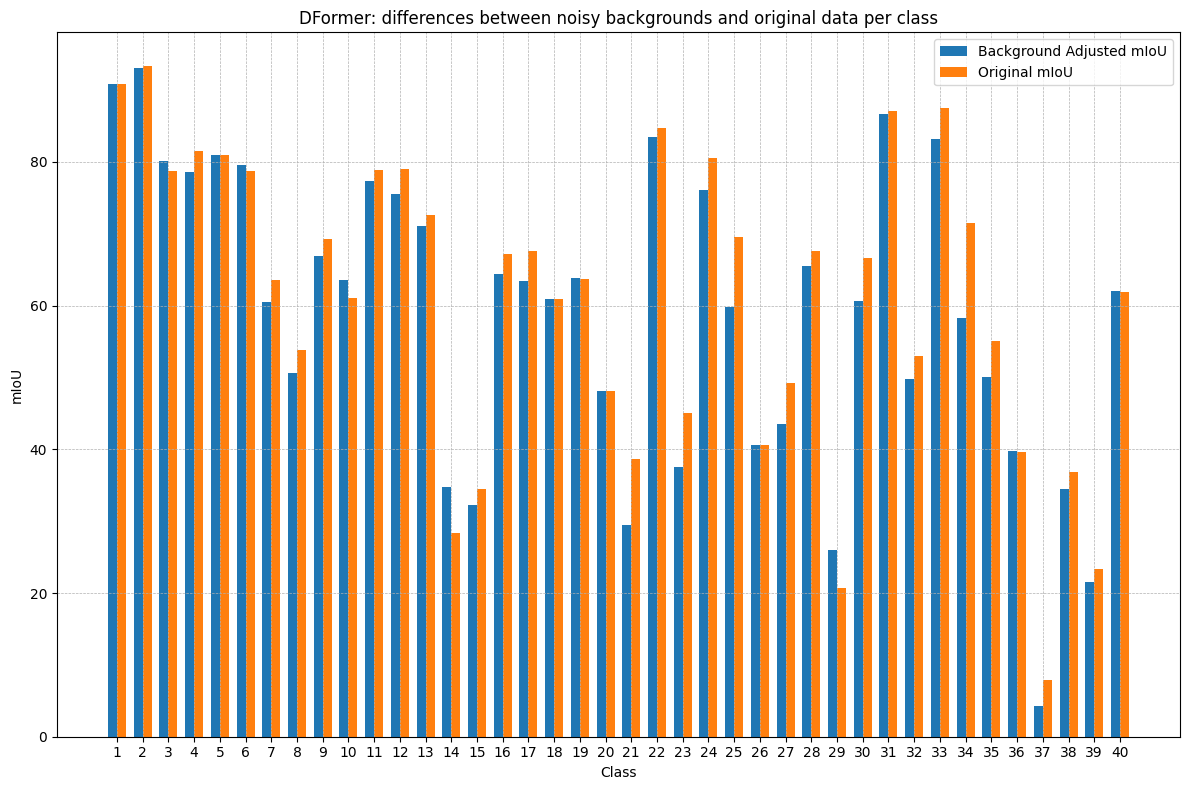

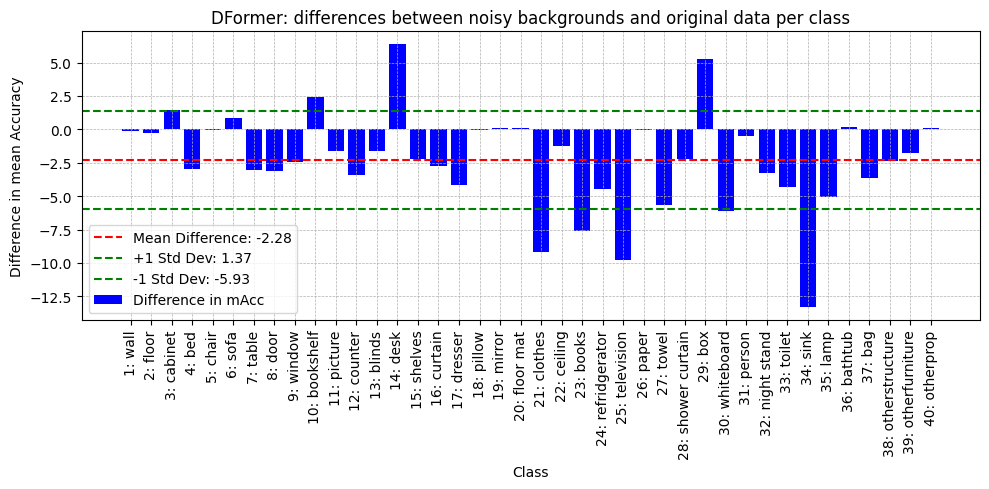

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

def parse_miou_file(file_path):
    background_adjusted_miou = []
    original_miou = []

    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if not "mIoU" in line:
                continue
            if line.strip():
                key, value = line.split(':')
                value = float(value.strip())
                if 'Background adjusted mIoU' in key:
                    background_adjusted_miou.append(value)
                elif 'Original mIoU' in key:
                    original_miou.append(value)
                    
    return background_adjusted_miou, original_miou

def plot_differences(background_adjusted_miou, original_miou, class_names, title="Model"):
    differences = np.array(background_adjusted_miou) - np.array(original_miou)
    mean_difference = np.mean(differences)
    std_difference = np.std(differences)
    
    classes = np.arange(1, len(differences) + 1)

    plt.figure(figsize=(12, 8))
    bar_width = 0.35
    index = np.arange(len(classes))
    
    bar1 = plt.bar(index, background_adjusted_miou, bar_width, label='Background Adjusted mIoU')
    bar2 = plt.bar(index + bar_width, original_miou, bar_width, label='Original mIoU')
    
    plt.xlabel('Class')
    plt.ylabel('mIoU')
    plt.title(f"{title}: differences between noisy backgrounds and original data per class")
    plt.xticks(index + bar_width / 2, classes)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    plt.tight_layout()
    plt.show()
    
    # Plotting the differences
    plt.figure(figsize=(10, 5))
    plt.bar(classes, differences, color='b', label='Difference in mAcc')
    plt.axhline(y=mean_difference, color='r', linestyle='--', label=f'Mean Difference: {mean_difference:.2f}')
    plt.axhline(y=mean_difference + std_difference, color='g', linestyle='--', label=f'+1 Std Dev: {mean_difference + std_difference:.2f}')
    plt.axhline(y=mean_difference - std_difference, color='g', linestyle='--', label=f'-1 Std Dev: {mean_difference - std_difference:.2f}')
    plt.xlabel('Class')
    plt.ylabel('Difference in mean Accuracy')
    plt.title(f"{title}: differences between noisy backgrounds and original data per class")
    class_names_with_index = [f"{i+1}: {class_names[i]}" for i in range(len(class_names))]
    plt.xticks(classes, class_names_with_index, rotation=90)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    plt.tight_layout()
    plt.show()

import sys
sys.path.append("../")
config_file_path = "configs.NYUDepthv2.DFormer_Base"

config_module = importlib.import_module(config_file_path)
config = config_module.config

file_path = "../checkpoints_fgbg_NYUDV2/log_20240613_103407.txt"
background_adjusted_miou, original_miou = parse_miou_file(file_path)

file_path2 = "../checkpoints_fgbg_NYUDV2/log_20240613_010559.txt"
background_adjusted_miou2, original_miou2 = parse_miou_file(file_path2)
# combine
background_adjusted_miou = np.array(background_adjusted_miou) + np.array(background_adjusted_miou2)
original_miou = np.array(original_miou) + np.array(original_miou2)
background_adjusted_miou = np.array(background_adjusted_miou) / 2
original_miou = np.array(original_miou) / 2
plot_differences(background_adjusted_miou, original_miou, config.class_names[1:], title="DFormer")

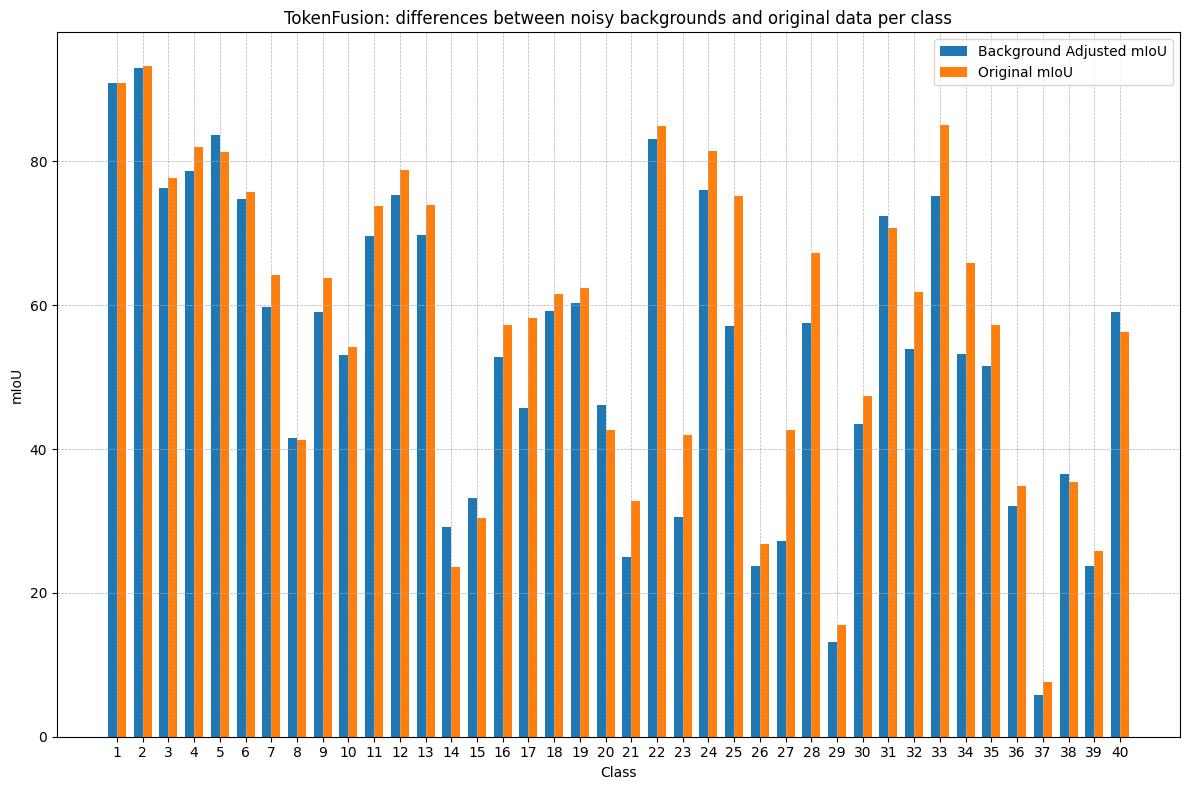

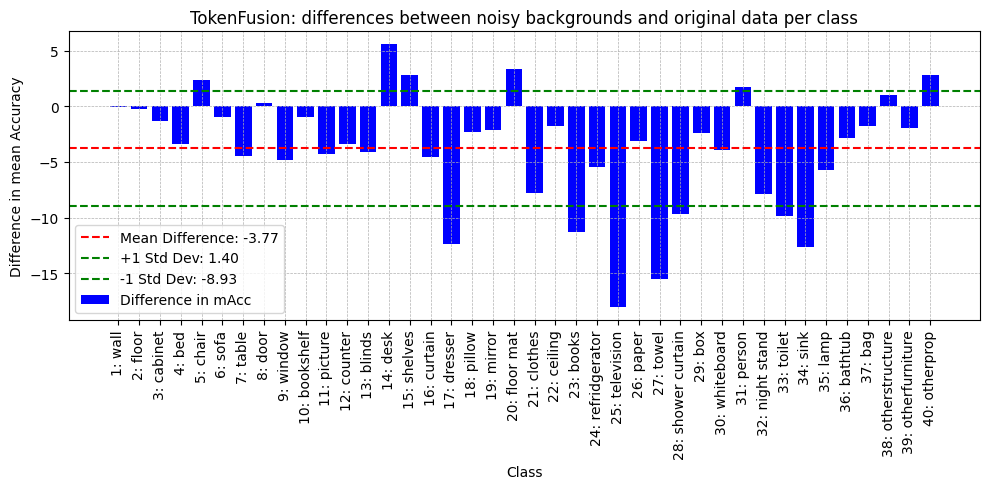

In [3]:
import sys
sys.path.append("../")
config_file_path = "configs.NYUDepthv2.DFormer_Base"
config_module = importlib.import_module(config_file_path)
config = config_module.config

file_path = "../checkpoints_fgbg_NYUDV2/log_20240616_164628.txt"
background_adjusted_miou, original_miou = parse_miou_file(file_path)

plot_differences(background_adjusted_miou, original_miou, config.class_names[1:], title="TokenFusion")

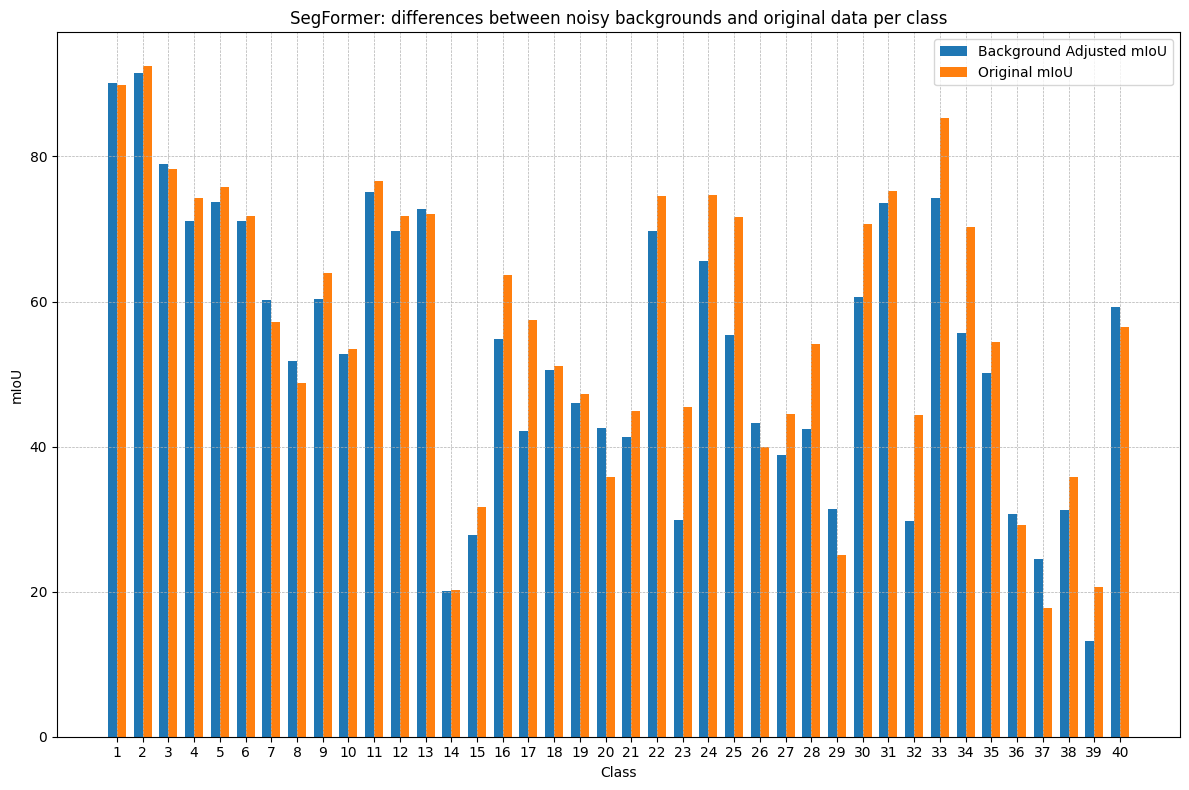

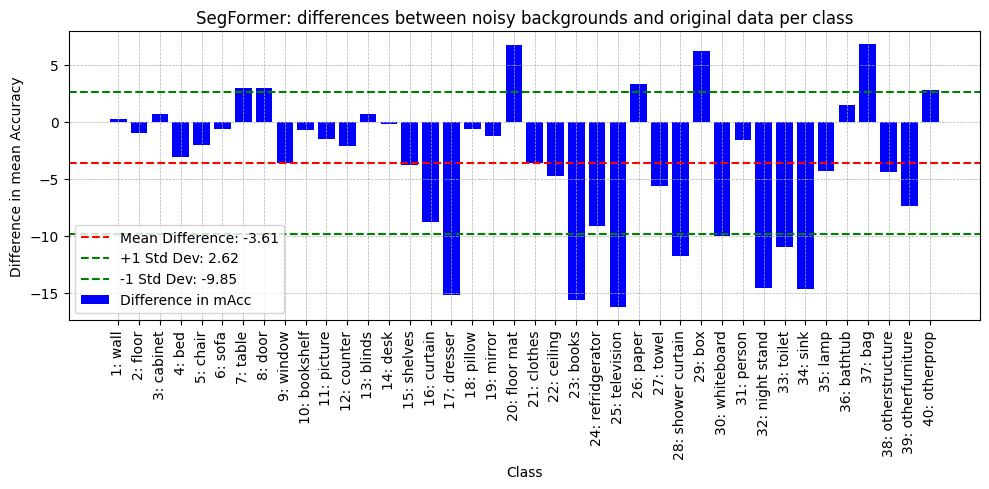

In [4]:
import sys
sys.path.append("../")
config_file_path = "configs.NYUDepthv2.DFormer_Base"
config_module = importlib.import_module(config_file_path)
config = config_module.config

file_path = "../checkpoints_fgbg_NYUDV2/log_20240618_135839.txt"
background_adjusted_miou, original_miou = parse_miou_file(file_path)

plot_differences(background_adjusted_miou, original_miou, config.class_names[1:], title="SegFormer")

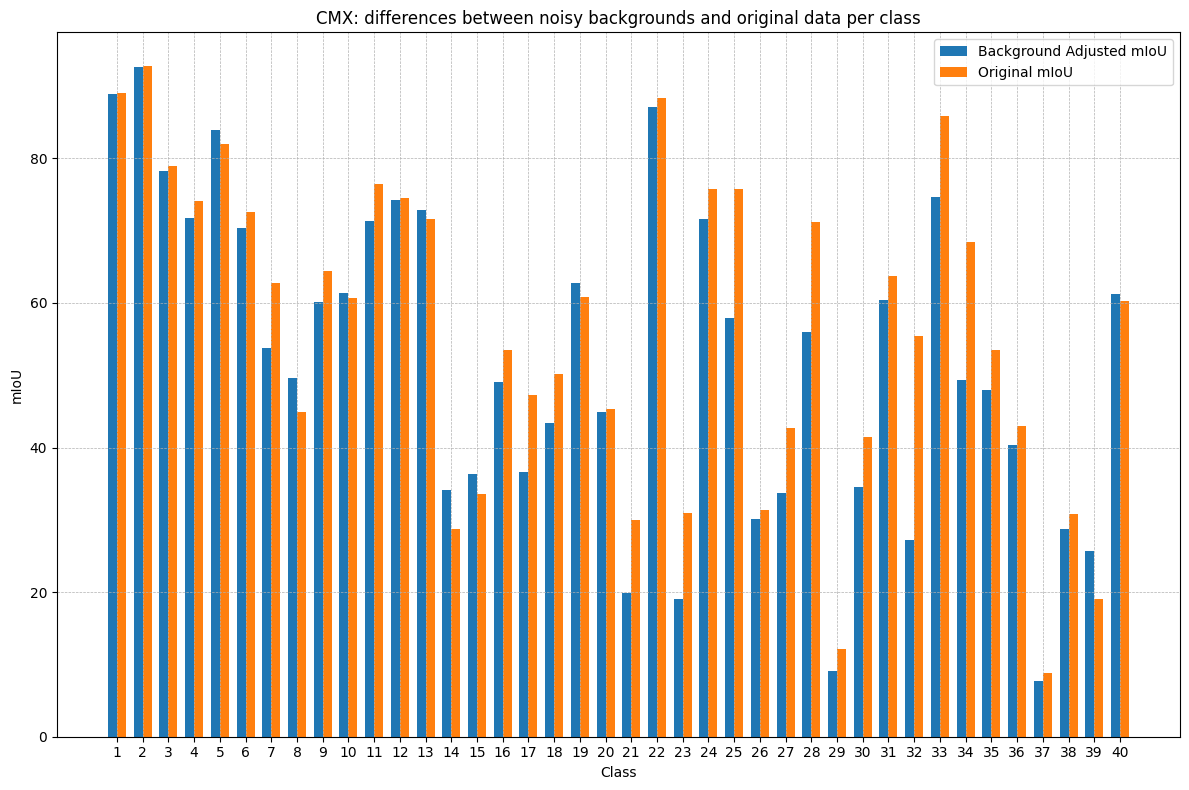

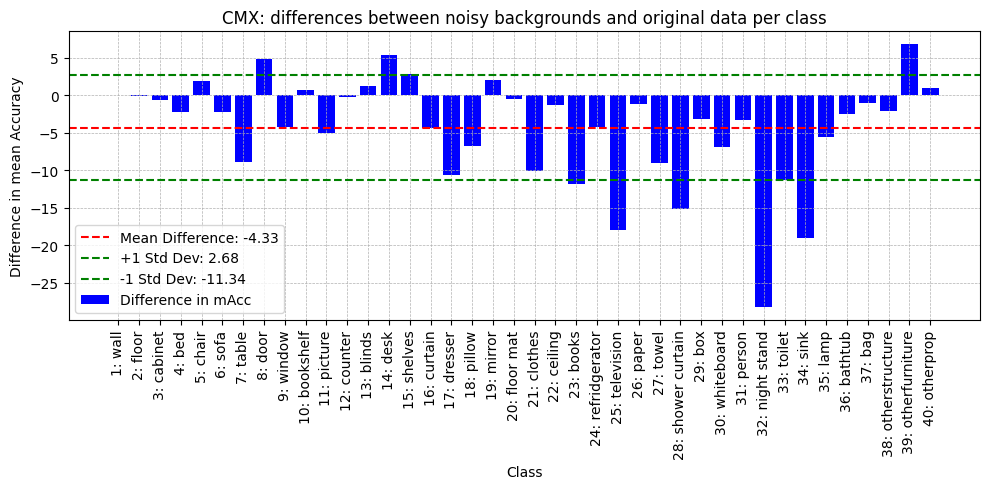

In [5]:
import sys
sys.path.append("../")
config_file_path = "configs.NYUDepthv2.DFormer_Base"
config_module = importlib.import_module(config_file_path)
config = config_module.config

file_path = "../checkpoints_fgbg_NYUDV2/log_20240624_110626.txt"
background_adjusted_miou, original_miou = parse_miou_file(file_path)

plot_differences(background_adjusted_miou, original_miou, config.class_names[1:], title="CMX")

37.467 41.172 43.60333333333333


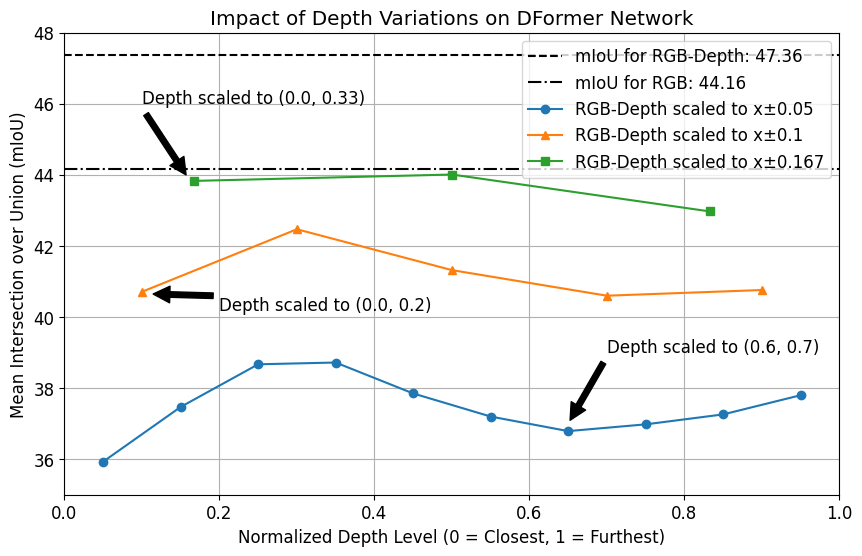

In [13]:
import numpy as np
import matplotlib.pyplot as plt

miou_depth_range_0_1 = np.array([35.93, 37.47, 38.67, 38.72, 37.85, 37.20, 36.79, 36.98, 37.26, 37.80])
miou_depth_range_0_2 = np.array([40.71, 42.47, 41.32, 40.60, 40.76])
miou_depth_range_0_33 = np.array([43.83, 44.01, 42.97])

miou_rgb_depth = np.array([47.25, 47.52, 47.34, 47.39, 47.27, 47.42, 47.36, 47.37, 47.41, 47.27])
miou_rgb = np.array([44.17, 44.15, 44.15, 44.16, 44.14, 44.18, 44.21, 44.16, 44.11, 44.19])
miou_rgb_depth = np.mean(miou_rgb_depth)
miou_rgb = np.mean(miou_rgb)

depth_level1 = np.linspace(0.05, 0.95, 10)
depth_level2 = np.linspace(0.1, 0.9, 5)
depth_level3 = np.linspace(0.1667, 0.8333, 3)

min_depth_0_05 = depth_level1 - 0.05
max_depth_0_05 = depth_level1 + 0.05

min_depth_0_1 = depth_level2 - 0.1
max_depth_0_1 = depth_level2 + 0.1

print(np.mean(miou_depth_range_0_1), np.mean(miou_depth_range_0_2), np.mean(miou_depth_range_0_33))


plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10, 6))
plt.axhline(y=miou_rgb_depth, color='black', linestyle='--', label=f'mIoU for RGB-Depth: {miou_rgb_depth:.2f}')
plt.axhline(y=miou_rgb, color='black', linestyle='-.', label=f'mIoU for RGB: {miou_rgb:.2f}')

plt.plot(depth_level1, miou_depth_range_0_1, label='RGB-Depth scaled to x±0.05', marker='o')
plt.plot(depth_level2, miou_depth_range_0_2, label='RGB-Depth scaled to x±0.1', marker='^')
plt.plot(depth_level3, miou_depth_range_0_33, label='RGB-Depth scaled to x±0.167', marker='s')



plt.xlabel('Normalized Depth Level (0 = Closest, 1 = Furthest)')
plt.ylabel('Mean Intersection over Union (mIoU)')
plt.title('Impact of Depth Variations on DFormer Network')

plt.annotate('Depth scaled to (0.0, 0.2)', xy=(0.11, 40.65), xytext=(0.2, 40.2),
                arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Depth scaled to (0.0, 0.33)', xy=(0.16, 43.9), xytext=(0.1, 46),
                arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Depth scaled to (0.6, 0.7)', xy=(0.65, 37), xytext=(0.7, 39),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend(loc='upper right', fontsize='medium')
plt.grid(True)
plt.xlim(0.0, 1.0)
plt.ylim(35, 48)
plt.show()

35.83299999999999 38.818 40.88


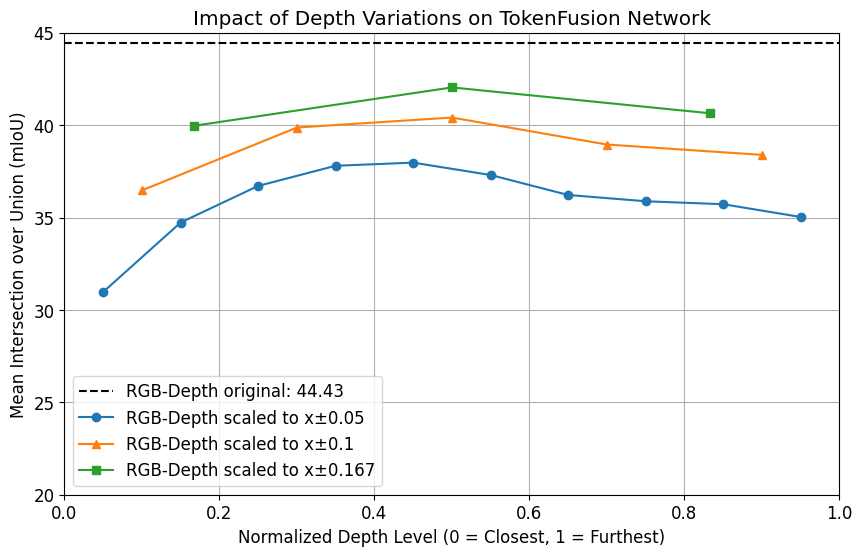

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import re

def get_miou_from_file(file_path):
    miou_values = {
        "depth_range_0_1": [],
        "depth_range_0_2": [],
        "depth_range_0_33": [],
    }
    with open(file_path, 'r') as file:
        lines = file.readlines()
        key = None
        for line in lines:
            if "depth_range=0.1" in line:
                key = "depth_range_0_1"
            elif "depth_range=0.2" in line:
                key = "depth_range_0_2"
            elif "depth_range=0.33" in line:
                key = "depth_range_0_33"
            if "miou" in line and "macc" in line:
                miou = float(re.search(r"[-+]?\d*\.\d+|\d+", line).group())
                miou_values[key].append(miou)

    return miou_values

file_path = "../checkpoints/NYUDepthv2_mit_b2/run_20240616-142722_tokenfusion/depth_level_tests.txt"

miou_values = get_miou_from_file(file_path)              

miou_depth_range_0_1 = miou_values["depth_range_0_1"]
miou_depth_range_0_2 = miou_values["depth_range_0_2"]
miou_depth_range_0_33 = miou_values["depth_range_0_33"]

print(np.mean(miou_depth_range_0_1), np.mean(miou_depth_range_0_2), np.mean(miou_depth_range_0_33))

miou_rgb_depth = 44.43

depth_level1 = np.linspace(0.05, 0.95, 10)
depth_level2 = np.linspace(0.1, 0.9, 5)
depth_level3 = np.linspace(0.1667, 0.8333, 3)

min_depth_0_05 = depth_level1 - 0.05
max_depth_0_05 = depth_level1 + 0.05

min_depth_0_1 = depth_level2 - 0.1
max_depth_0_1 = depth_level2 + 0.1


plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10, 6))
plt.axhline(y=miou_rgb_depth, color='black', linestyle='--', label=f'RGB-Depth original: {miou_rgb_depth:.2f}')
# plt.axhline(y=miou_rgb, color='black', linestyle='-.', label=f'mIoU for RGB: {miou_rgb:.2f}')

plt.plot(depth_level1, miou_depth_range_0_1, label='RGB-Depth scaled to x±0.05', marker='o')
plt.plot(depth_level2, miou_depth_range_0_2, label='RGB-Depth scaled to x±0.1', marker='^')
plt.plot(depth_level3, miou_depth_range_0_33, label='RGB-Depth scaled to x±0.167', marker='s')



plt.xlabel('Normalized Depth Level (0 = Closest, 1 = Furthest)')
plt.ylabel('Mean Intersection over Union (mIoU)')
plt.title('Impact of Depth Variations on TokenFusion Network')

plt.legend(fontsize='medium')
plt.grid(True)
plt.xlim(0.0, 1.0)
plt.ylim(20, 45)
plt.show()

32.17 35.878 38.376666666666665


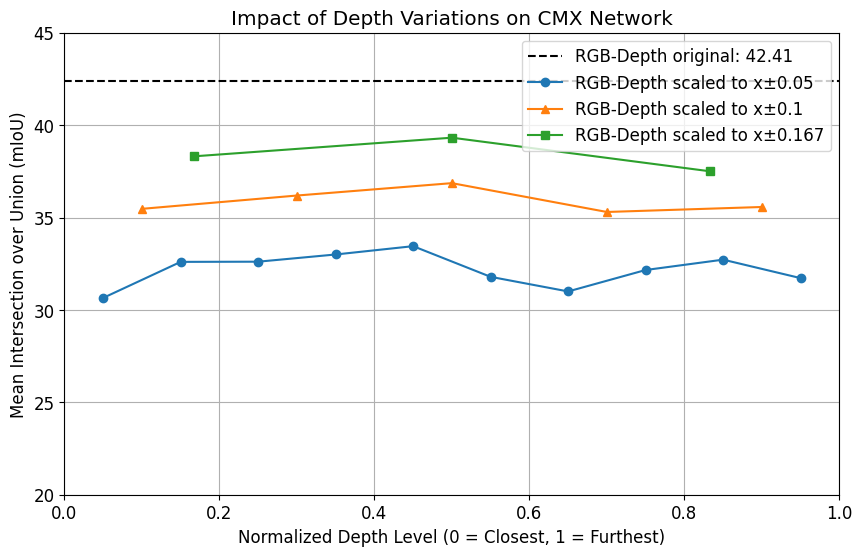

In [6]:
file_path = "../checkpoints/NYUDepthv2_mit_b2/run_20240623-232951_cmx2/depth_level_tests.txt"

miou_values = get_miou_from_file(file_path)              

miou_depth_range_0_1 = miou_values["depth_range_0_1"]
miou_depth_range_0_2 = miou_values["depth_range_0_2"]
miou_depth_range_0_33 = miou_values["depth_range_0_33"]

print(np.mean(miou_depth_range_0_1), np.mean(miou_depth_range_0_2), np.mean(miou_depth_range_0_33))

miou_rgb_depth = 42.41

depth_level1 = np.linspace(0.05, 0.95, 10)
depth_level2 = np.linspace(0.1, 0.9, 5)
depth_level3 = np.linspace(0.1667, 0.8333, 3)

min_depth_0_05 = depth_level1 - 0.05
max_depth_0_05 = depth_level1 + 0.05

min_depth_0_1 = depth_level2 - 0.1
max_depth_0_1 = depth_level2 + 0.1


plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10, 6))
plt.axhline(y=miou_rgb_depth, color='black', linestyle='--', label=f'RGB-Depth original: {miou_rgb_depth:.2f}')
# plt.axhline(y=miou_rgb, color='black', linestyle='-.', label=f'mIoU for RGB: {miou_rgb:.2f}')

plt.plot(depth_level1, miou_depth_range_0_1, label='RGB-Depth scaled to x±0.05', marker='o')
plt.plot(depth_level2, miou_depth_range_0_2, label='RGB-Depth scaled to x±0.1', marker='^')
plt.plot(depth_level3, miou_depth_range_0_33, label='RGB-Depth scaled to x±0.167', marker='s')



plt.xlabel('Normalized Depth Level (0 = Closest, 1 = Furthest)')
plt.ylabel('Mean Intersection over Union (mIoU)')
plt.title('Impact of Depth Variations on CMX Network')

plt.legend(loc='upper right', fontsize='medium')
plt.grid(True)
plt.xlim(0.0, 1.0)
plt.ylim(20, 45)
plt.show()

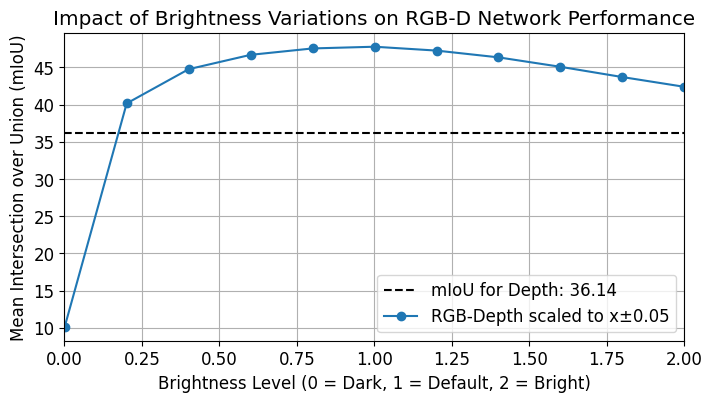

In [39]:
miou_brightness = np.array([10.15, 40.17, 44.77, 46.70, 47.56, 47.79, 47.27, 46.36, 45.09, 43.71, 42.40])

miou_depth = np.array([36.14])

brightness_levels = np.linspace(0.001, 2.0, 11)


plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 4))
plt.axhline(y=miou_depth, color='black', linestyle='--', label=f'mIoU for Depth: {miou_depth[0]:.2f}')

plt.plot(brightness_levels, miou_brightness, label='RGB-Depth scaled to x±0.05', marker='o')

plt.xlabel('Brightness Level (0 = Dark, 1 = Default, 2 = Bright)')
plt.ylabel('Mean Intersection over Union (mIoU)')
plt.title('Impact of Brightness Variations on RGB-D Network Performance')

plt.legend(fontsize='medium')
plt.grid(True)
plt.xlim(0.0, 2.0)
plt.show()

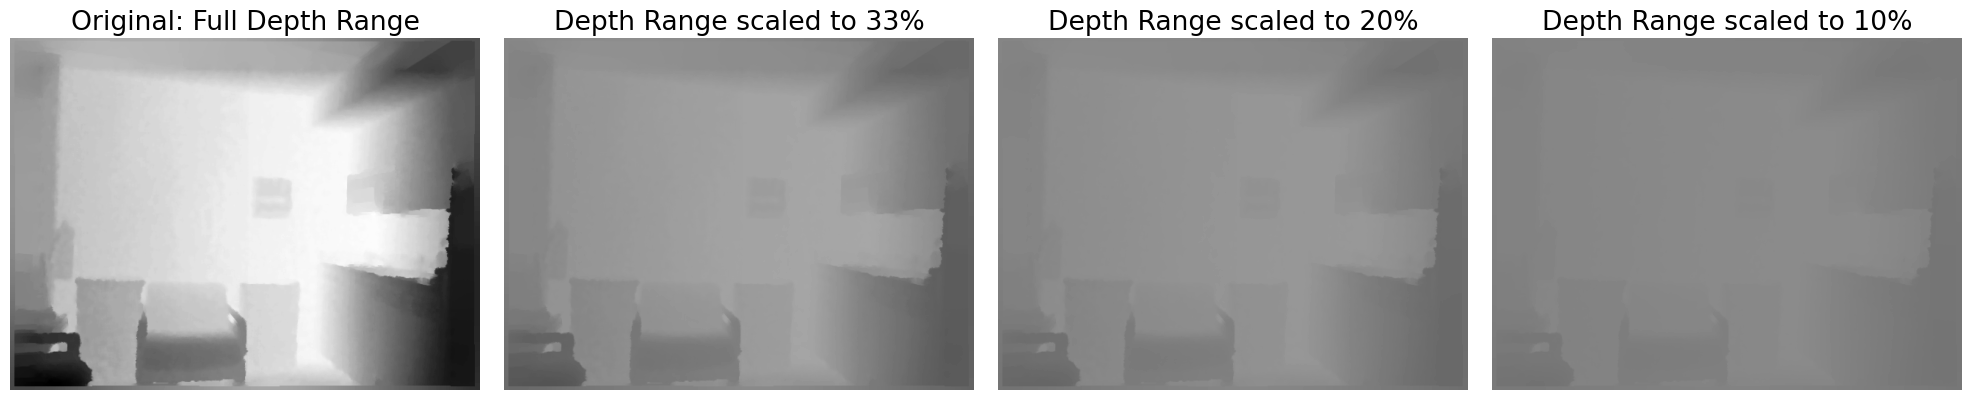

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def adjust_depth_level(image_path, destination_path, depth_level, depth_range=0.1):
    depth_image = Image.open(image_path)
    depth_image = np.array(depth_image)
    min_depth = np.min(depth_image)
    max_depth = np.max(depth_image)

    # Normalize to [0, 1]
    normalized_depth_image = (depth_image - min_depth) / (max_depth - min_depth)

    # Scale to the desired depth level
    min_depth = 0
    max_depth = 1 - depth_range
    scaled_depth_image = normalized_depth_image * depth_range + min(max_depth, max(min_depth, depth_level))

    depth_image = np.clip(scaled_depth_image * 255, 0, 255)

    # Convert to uint8
    depth_image = depth_image.astype(np.uint8)

    depth_image = Image.fromarray(depth_image)
    depth_image = depth_image.convert("L")

    return depth_image

depth_image_path = "../datasets/NYUDepthv2/Depth/0.png"
depth_image = cv2.imread(depth_image_path, cv2.IMREAD_GRAYSCALE)

depth_ranges = [0.33, 0.2, 0.1]
depth_levels = [0.33, 0.4, 0.45]

plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(1, 4, figsize=(20, 5.5))

# fig.suptitle('Examples of Depth Images for different scales', fontsize=20)

# Get the min and max depth values for consistent scaling
vmin = depth_image.min()
vmax = depth_image.max()

axs[0].imshow(depth_image, cmap='gray', vmin=vmin, vmax=vmax)
axs[0].axis('off')

for depth_level, depth_range in zip(depth_levels, depth_ranges):
    adjusted_depth_image = adjust_depth_level(depth_image_path, None, depth_level, depth_range)
    axs[depth_ranges.index(depth_range) + 1].imshow(adjusted_depth_image, cmap='gray', vmin=vmin, vmax=vmax)
    axs[depth_ranges.index(depth_range) + 1].axis('off')

axs[0].set_title('Original: Full Depth Range')
axs[1].set_title('Depth Range scaled to 33%')
axs[2].set_title('Depth Range scaled to 20%')
axs[3].set_title('Depth Range scaled to 10%')


plt.tight_layout()
plt.show()


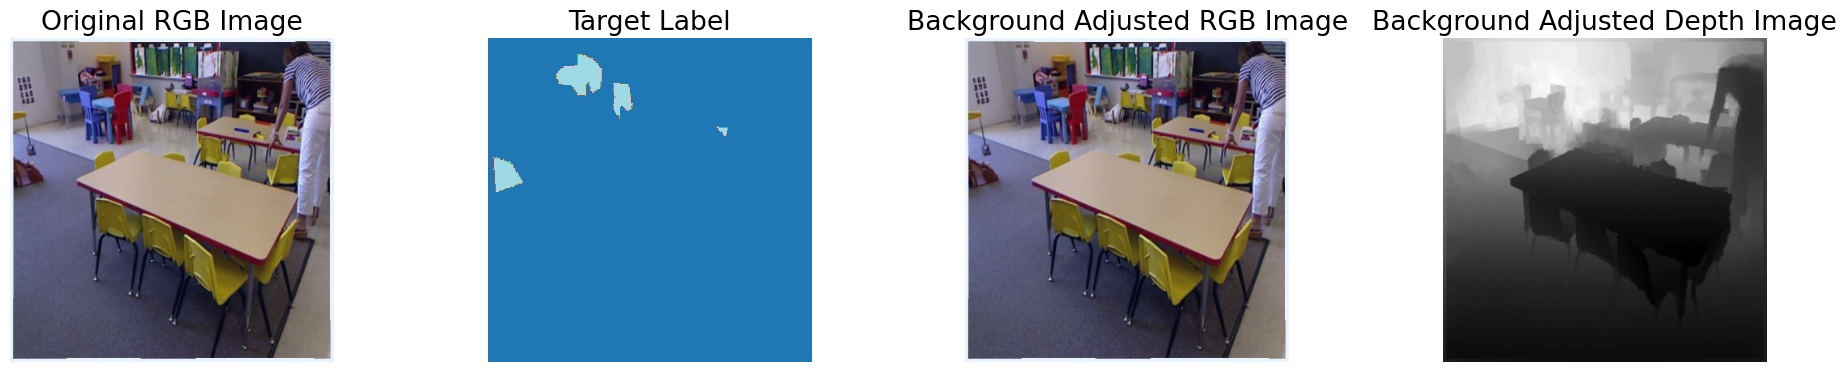

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

bg_adjusted_image_path = "../datasets/NYUDepthv3/RGB/test_132.png"
bg_adjusted_depth_image_path = "../datasets/NYUDepthv3/Depth/test_132.png"
bg_adjusted_labels_path = "../datasets/NYUDepthv3/labels/test_132.png"
image_path = "../datasets/NYUDepthv4/RGB/test_132.png"

plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(1, 4, figsize=(20, 5.5))

# fig.suptitle('Examples of RGB Images with different backgrounds', fontsize=20)

axs[0].imshow(cv2.imread(image_path)[:, :, ::-1])
axs[0].axis('off')
axs[0].set_title('Original RGB Image')

axs[1].imshow(cv2.imread(bg_adjusted_labels_path, cv2.IMREAD_GRAYSCALE), cmap='tab20')
axs[1].axis('off')
axs[1].set_title('Target Label')

axs[2].imshow(cv2.imread(bg_adjusted_image_path)[:, :, ::-1])
axs[2].axis('off')
axs[2].set_title('Background Adjusted RGB Image')

axs[3].imshow(cv2.imread(bg_adjusted_depth_image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
axs[3].axis('off')
axs[3].set_title('Background Adjusted Depth Image')

plt.subplots_adjust(hspace=0.0, wspace=0.05)


plt.tight_layout()
plt.show()

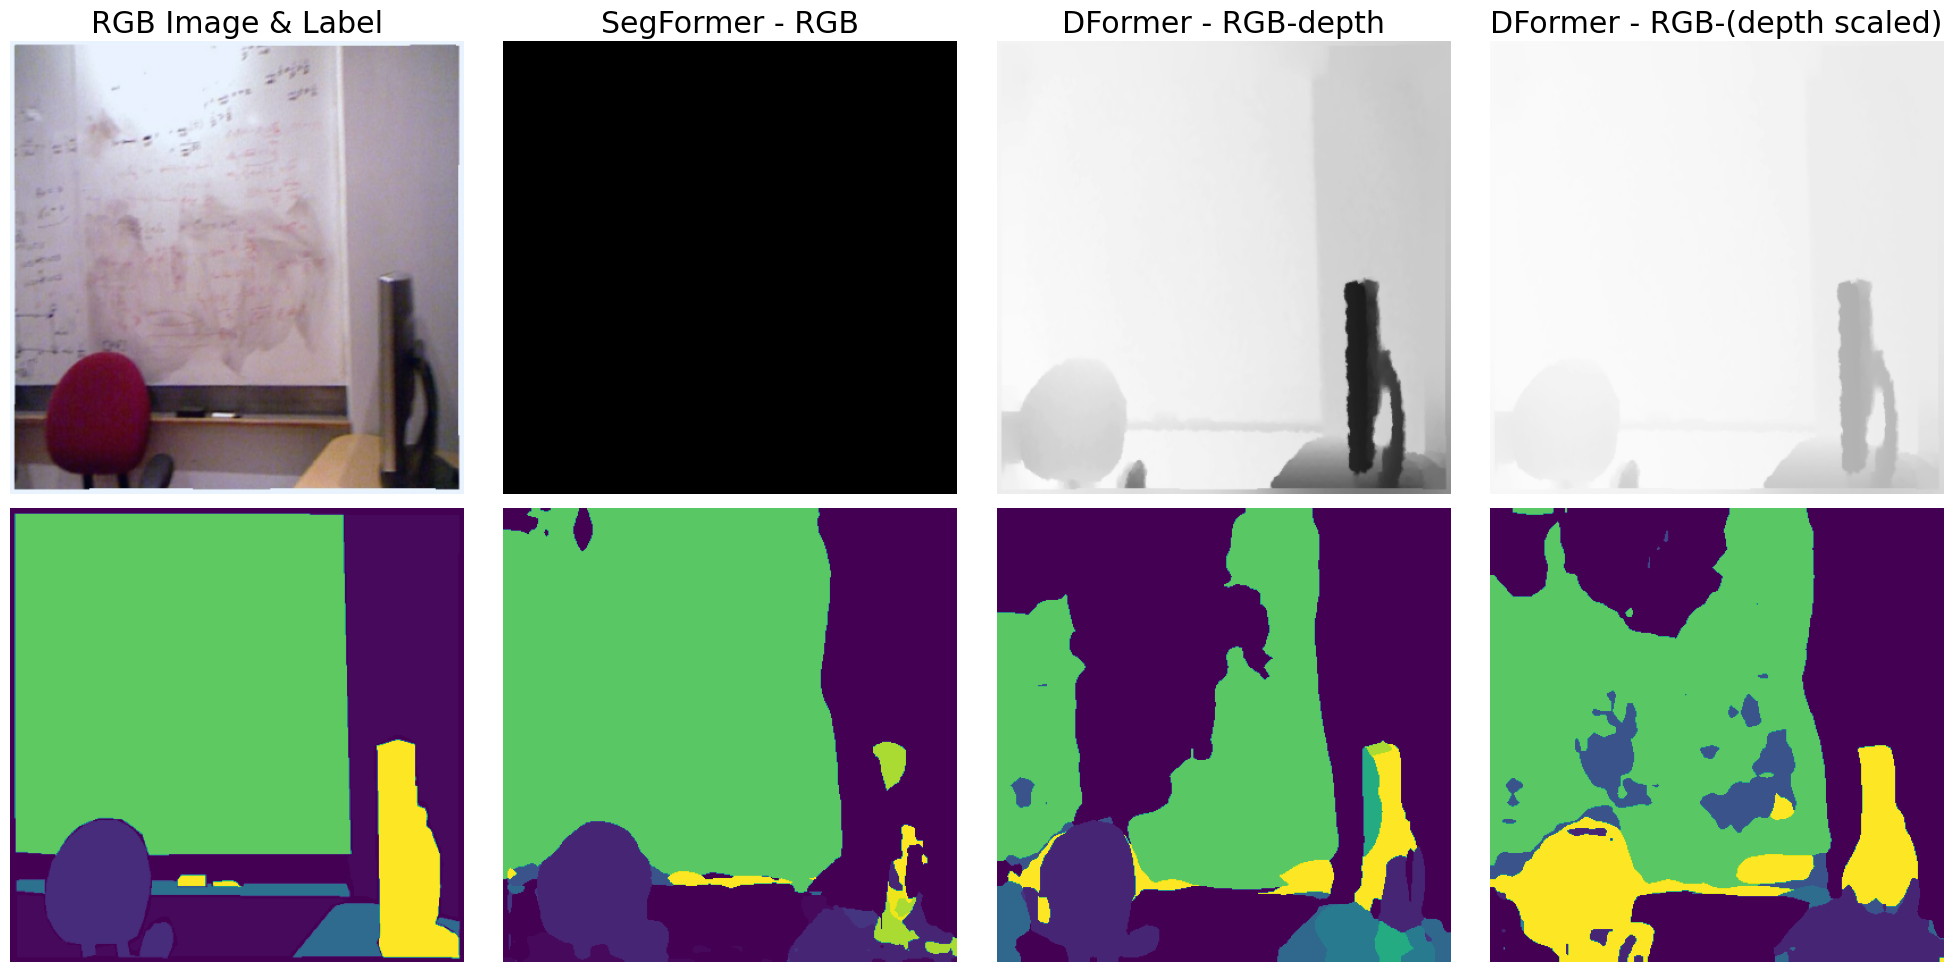

In [16]:
rgb_image = "../checkpoints/NYUDepthv2_DFormer-Base/run_20240607-111847/predictions_whiteboard/rgb_image_14.npy"
label_image = "../checkpoints/NYUDepthv2_MiT-B2/run_20240606-222137/predictions_whiteboard_rgb/label_14.npy"
prediction_rgb = "../checkpoints/NYUDepthv2_MiT-B2/run_20240606-222137/predictions_whiteboard_rgb/prediction_14.npy"
prediction_da_066_100 = "../checkpoints/NYUDepthv2_DFormer-Base/run_20240607-111847/predictions_whiteboard_da_066_100/prediction_14.npy"
prediction_rgbd = "../checkpoints/NYUDepthv2_DFormer-Base/run_20240607-111847/predictions_whiteboard/prediction_14.npy"
depth_rgbd = "../checkpoints/NYUDepthv2_DFormer-Base/run_20240607-111847/predictions_whiteboard/depth_image_14.npy"
depth_da_066_100 = "../checkpoints/NYUDepthv2_DFormer-Base/run_20240607-111847/predictions_whiteboard_da_066_100/depth_image_14.npy"
depth_rgb = "../checkpoints/NYUDepthv2_MiT-B2/run_20240606-222137/predictions_whiteboard_rgb/depth_image_14.npy"

import numpy as np
import matplotlib.pyplot as plt
import cv2

min_depth = -2.5
max_depth = 2.5

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
plt.rcParams.update({'font.size': 18})
axs[0, 0].imshow(np.load(rgb_image))
axs[0, 0].axis('off')
axs[0, 0].set_title('RGB Image & Label')
axs[1, 0].imshow(np.load(label_image), cmap='viridis')
axs[1, 0].axis('off')

axs[0, 1].imshow(np.load(depth_rgb), cmap='gray')
axs[0, 1].axis('off')
axs[0, 1].set_title('SegFormer - RGB')
axs[1, 1].imshow(np.load(prediction_rgb), cmap='viridis')
axs[1, 1].axis('off')

axs[0, 2].imshow(np.load(depth_rgbd), cmap='gray', vmin=min_depth, vmax=max_depth)
axs[0, 2].axis('off')
axs[0, 2].set_title('DFormer - RGB-depth')
axs[1, 2].imshow(np.load(prediction_rgbd), cmap='viridis')
axs[1, 2].axis('off')

axs[0, 3].imshow(np.load(depth_da_066_100), cmap='gray', vmin=min_depth, vmax=max_depth)
axs[0, 3].axis('off')
axs[0, 3].set_title('DFormer - RGB-(depth scaled)')
axs[1, 3].imshow(np.load(prediction_da_066_100), cmap='viridis')
axs[1, 3].axis('off')

plt.tight_layout()
plt.show()



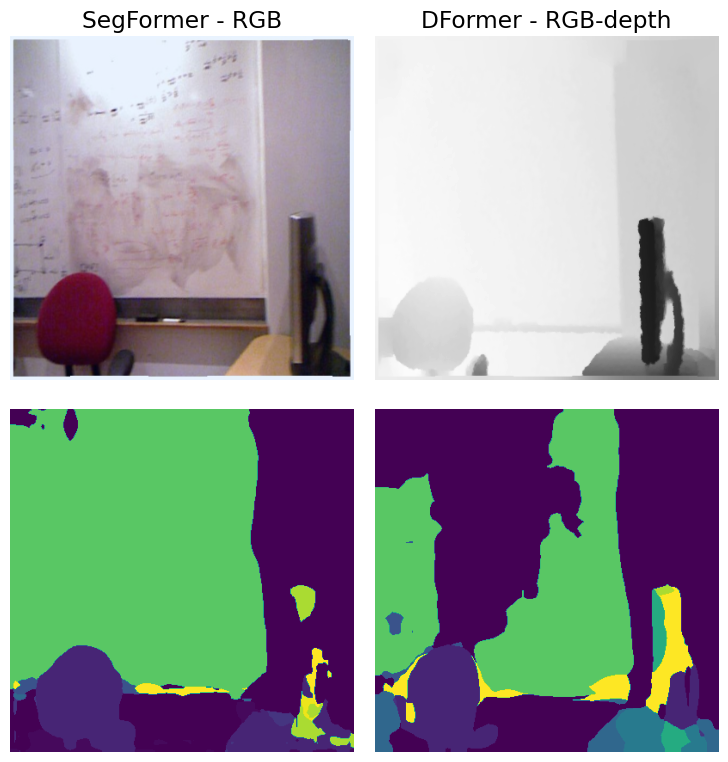

In [24]:
rgb_image = "../checkpoints/NYUDepthv2_DFormer-Base/run_20240607-111847/predictions_whiteboard/rgb_image_14.npy"
label_image = "../checkpoints/NYUDepthv2_MiT-B2/run_20240606-222137/predictions_whiteboard_rgb/label_14.npy"
prediction_rgb = "../checkpoints/NYUDepthv2_MiT-B2/run_20240606-222137/predictions_whiteboard_rgb/prediction_14.npy"
prediction_da_066_100 = "../checkpoints/NYUDepthv2_DFormer-Base/run_20240607-111847/predictions_whiteboard_da_066_100/prediction_14.npy"
prediction_rgbd = "../checkpoints/NYUDepthv2_DFormer-Base/run_20240607-111847/predictions_whiteboard/prediction_14.npy"
depth_rgbd = "../checkpoints/NYUDepthv2_DFormer-Base/run_20240607-111847/predictions_whiteboard/depth_image_14.npy"
depth_da_066_100 = "../checkpoints/NYUDepthv2_DFormer-Base/run_20240607-111847/predictions_whiteboard_da_066_100/depth_image_14.npy"
depth_rgb = "../checkpoints/NYUDepthv2_MiT-B2/run_20240606-222137/predictions_whiteboard_rgb/depth_image_14.npy"

import numpy as np
import matplotlib.pyplot as plt
import cv2

min_depth = -2.5
max_depth = 2.5

fig, axs = plt.subplots(2, 2, figsize=(7.5, 8))
plt.rcParams.update({'font.size': 14})
axs[0, 0].imshow(np.load(rgb_image))
axs[0, 0].axis('off')
axs[0, 0].set_title('SegFormer - RGB')
axs[1, 0].imshow(np.load(prediction_rgb), cmap='viridis')
axs[1, 0].axis('off')

axs[0, 1].imshow(np.load(depth_rgbd), cmap='gray', vmin=min_depth, vmax=max_depth)
axs[0, 1].axis('off')
axs[0, 1].set_title('DFormer - RGB-depth')
axs[1, 1].imshow(np.load(prediction_rgbd), cmap='viridis')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [7]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

def parse_experiment_data(file):
    with open(file, 'r') as f:
        data = f.read()
    parsed_data = {}
    lines = data.strip().split("\n")
    
    current_experiment = ""
    current_property = ""
    current_property_value = 0.0

    for line in lines:
        line = line.strip()
        if line.startswith("Experiment:"):
            current_experiment = line.split(":")[1].strip()
            parsed_data[current_experiment] = {}
        elif line.startswith("Property:"):
            parts = line.split("Property value:")
            current_property_value = float(parts[1].strip())
            if current_property_value not in parsed_data[current_experiment]:
                parsed_data[current_experiment][current_property_value] = {}

        if parsed_data == {} or parsed_data[current_experiment] == {}: continue
        
        if "mIoU" in line:
            parsed_data[current_experiment][current_property_value]["mIoU"] = float(re.search(r"\d+\.\d+", line).group())
    
    return parsed_data


In [8]:
# G:\mscPascalBenschop\code\UsefullnessOfDepth\checkpoints_robustness_NYUDV2\log_20240623_132513.txt
aggregated_data_TF = parse_experiment_data("../checkpoints_robustness_NYUDV2/log_20240623_132513.txt")
# G:\mscPascalBenschop\code\UsefullnessOfDepth\checkpoints_robustness_NYUDV2\log_20240623_141607.txt
aggregated_data_SF = parse_experiment_data("../checkpoints_robustness_NYUDV2/log_20240623_141607.txt")
# G:\mscPascalBenschop\code\UsefullnessOfDepth\checkpoints_robustness_NYUDV2\log_20240623_144208.txt
aggregated_data_DF = parse_experiment_data("../checkpoints_robustness_NYUDV2/log_20240623_144208.txt")
# G:\mscPascalBenschop\code\UsefullnessOfDepth\checkpoints_robustness_NYUDV2\log_20240624_011358.txt
aggregated_data_CMX = parse_experiment_data("../checkpoints_robustness_NYUDV2/log_20240624_011358.txt")


aggregate_d_data = {}
for experiment_name, data in aggregated_data_DF.items():
    aggregate_d_data[experiment_name] = {}
    for property_value, metrics in data.items():
        aggregate_d_data[experiment_name][property_value] = {
            "RGB-D_DFormer": metrics["mIoU"],
            "RGB-D_TokenFusion": aggregated_data_TF[experiment_name][property_value]["mIoU"],
            "RGB-D_CMX": aggregated_data_CMX[experiment_name][property_value]["mIoU"],
            "RGB": aggregated_data_SF[experiment_name][property_value]["mIoU"],
        }

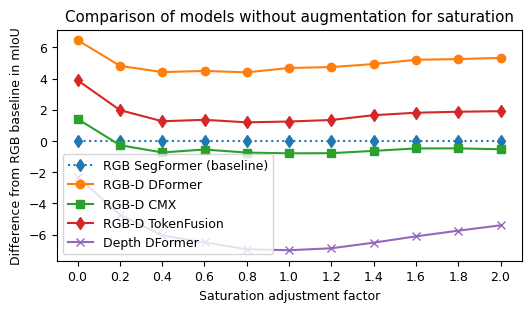

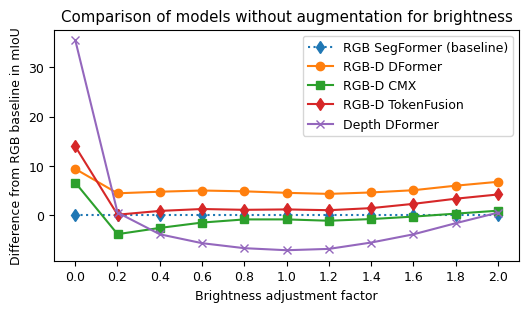

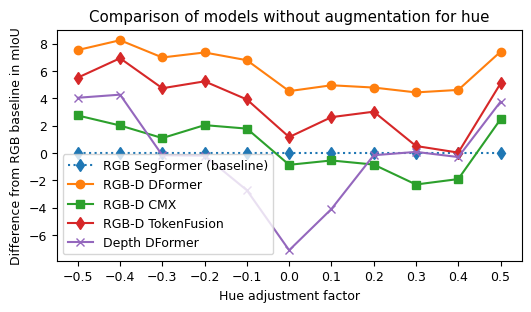

In [19]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np


property_values = {
        "saturation": np.linspace(0.001, 2.0, 11),
        "brightness": np.linspace(0.001, 2.0, 11),
        "hue": np.linspace(-0.5, 0.5, 11),
}

x_label_degrees = {
    "saturation": (0.001, 2.0),
    "brightness": (0.001, 2.0),
    "hue": (-0.5, 0.5),
}

def plot_aggregated_data3(data, figsize=(10, 10)):
    for experiment_name, properties in data.items():
        models_without_variation = ["RGB-D_DFormer", "RGB-D_CMX", "RGB-D_TokenFusion", "Depth DFormer"]
        model_names = ["RGB-D DFormer", "RGB-D CMX", "RGB-D TokenFusion", "Depth DFormer"]
        markers = ['o', 's', 'd', 'x']

        # Baseline plot for RGB_VARIATION
        baseline = np.zeros(len(property_values[experiment_name]))

        # Extracting data
        model_data = {model: [] for model in models_without_variation + ["RGB"]}
        for property_name, values in properties.items():
            for model in model_data:
                if model == "Depth DFormer":
                    model_data[model].append(36.14)
                else:
                    model_data[model].append(values[model])
        

        # Second plot: Models without VARIATION but include DEPTH
        plt.figure(figsize=figsize)
        plt.title(f"Comparison of models without augmentation for {experiment_name}")

        # Baseline plot for RGB
        plt.plot(property_values[experiment_name], baseline, label='RGB SegFormer (baseline)', marker='d', linestyle='dotted')
        # plt.fill_between(property_values[experiment_name], baseline - np.std(model_data["RGB"], axis=1), baseline + np.std(model_data["RGB"], axis=1), alpha=0.1)

        for i, model in enumerate(models_without_variation):
            # mean_diff = np.mean(model_data[model], axis=1) - np.mean(model_data["RGB"], axis=1)
            # std_diff = np.std(model_data[model], axis=1)
            mean_diff = np.array(model_data[model]) - np.array(model_data["RGB"]) 
            plt.plot(property_values[experiment_name], mean_diff, label=model_names[i], marker=markers[i])
            # plt.fill_between(property_values[experiment_name], mean_diff - std_diff, mean_diff + std_diff, alpha=0.1)

        plt.xlabel(f"{experiment_name.capitalize()} adjustment factor")
        plt.ylabel('Difference from RGB baseline in mIoU')
        plt.xticks([np.round(val, 2) for val in property_values[experiment_name]])
        plt.legend()
        plt.show()


plt.rcParams.update({'font.size': 9})
plot_aggregated_data3(aggregate_d_data, figsize=(6, 3))